DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [415]:
# Add the boilerplate code for importing the required packages and data
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("titanic.csv")
df.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [416]:
total_passengers = df.shape[0]

percentage_male = df.query('Sex == 1').shape[0] / total_passengers * 100

percentage_survived = df.query('Survived == 1').shape[0] / total_passengers * 100

total_passengers, percentage_male, percentage_survived



(891, 64.75869809203144, 38.38383838383838)

Your written answer:

 - 891
 - 64.75869809203144
 - 38.38383838383838

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [417]:
percentage_survived_female = df.query("Sex == 0 and Survived == 1").shape[0] / total_passengers * 100
percentage_survived_male = df.query("Sex == 1 and Survived == 1").shape[0] / total_passengers * 100

percentage_survived_female, percentage_survived_male

(26.15039281705948, 12.2334455667789)

Your written answer:

 - 26.15039281705948
 - 12.2334455667789

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [418]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,0,0,1,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0,373450,Mr,0


In [419]:
df_filtered = df.groupby("Pclass").agg(
    total_tickets=("PassengerId", "count"),
    survivorship=("Survived", "sum"), 
)

# total tickets(no of people) for each class as a percentage of the total passengers.
df_filtered["percentage_of_total_tickets"] = df_filtered["total_tickets"]/ total_passengers * 100
# total survivorship for each class as a percentage of the total survivors.
df_filtered["survivorship_percentage"] = df_filtered["survivorship"] / df.query("Survived == 1").shape[0] * 100

df_filtered

,total_tickets,survivorship,percentage_of_total_tickets,survivorship_percentage
Pclass,,,,
1,216,136,24.242424,39.766082
2,184,87,20.650954,25.438596
3,491,119,55.106622,34.795322


Your written answer:

 - Class 1 
    - % tickets: 24.242424
    - % survivorship: 39.766082
- Class 2 
    - % tickets: 20.650954
    - % survivorship: 25.438596
- Class 3
    - % tickets: 55.106622
    - % survivorship: 34.795322


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.



Survivors:
    Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0

Non-Survivors:
    Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


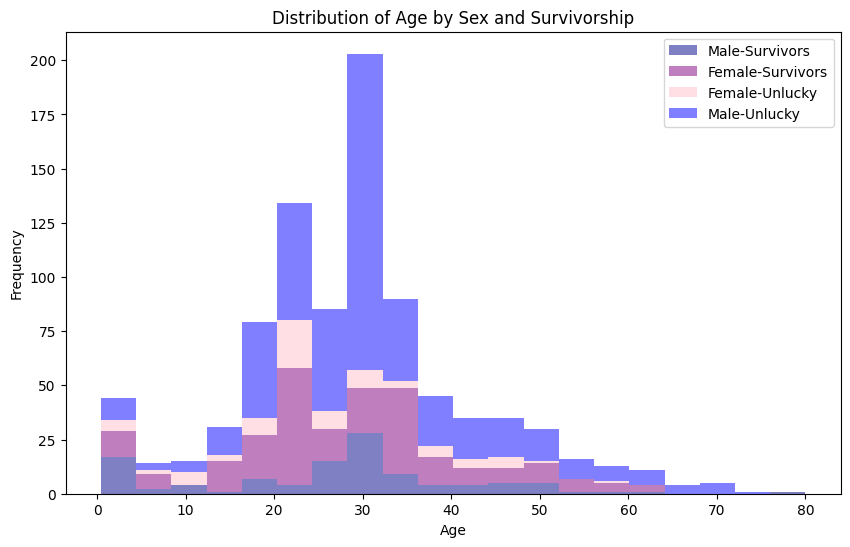

In [420]:
# Create dataframes for survivors and non-survivors using df.query
survivors = df.query('Survived == 1')[['Age', 'Name', 'Sex']]
non_survivors = df.query('Survived == 0')[['Age', 'Name', 'Sex']]

print("Survivors:")
print(survivors.head())

print("\nNon-Survivors:")
print(non_survivors.head())


# Create a figure showing the distribution of age by sex and survivorship
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist([survivors.query('Sex == 1')['Age'], survivors.query('Sex == 0')['Age'], 
          non_survivors.query('Sex == 0')['Age'], non_survivors.query('Sex == 1')['Age']], 
         bins=20, alpha=0.5, label=['Male-Survivors', 'Female-Survivors', 'Female-Unlucky', 'Male-Unlucky'], 
         color=['darkblue', 'purple', 'pink', 'blue'], histtype='barstacked')


# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age by Sex and Survivorship')
plt.legend()

# Show plot
plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

In [421]:
features = ['Age', 'Fare', 'Pclass', 'Sex', 'Family_Size']

label = ['Survived']

In [422]:
def plotDecisionBoundary(model, data = None, xy_lim = None, ax = None):

    import matplotlib.pyplot as plt
    import numpy as np
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize = (5,5))
    else:
        fig = ax.get_figure()
    
    # Check if data or xy_lim is provided
    if data is None and xy_lim is None:
        raise ValueError('If data is None, xy_lim must be provided')
    elif xy_lim is not None:
        f0_min, f0_max, f1_min, f1_max = xy_lim[0][0], xy_lim[0][1], xy_lim[1][0], xy_lim[1][1]
    elif not data is None:
        X = data[0]
        y = data[1]
        f0_min, f0_max, f1_min, f1_max = min(X[:,0]), max(X[:,0]), min(X[:,1]), max(X[:,1])

    range0, range1 = f0_max-f0_min, f1_max-f1_min

    F0, F1 = np.meshgrid(np.linspace(f0_min-0.1*range0, f0_max+0.1*range0, 200), np.linspace(f1_min-0.1*range1, f1_max+0.1*range1, 200))
    F_grid = np.vstack([F0.ravel(), F1.ravel()]).transpose()

    labels = model.classes_
    label_nums = np.arange(len(labels))
    label_dict = dict(zip(labels, label_nums))

    y_grid = model.predict(F_grid)
    y_num_grid = np.array([label_dict[y_lab] for y_lab in y_grid]).reshape(F0.shape)

    cmap = plt.get_cmap('tab10', len(labels))
    ax.contourf(F0, F1, y_num_grid, cmap = cmap, alpha = 0.25)

    if not data is None:
        for label, label_num in zip(labels, label_nums):
            ax.scatter(X[y==label,0], X[y==label,1], label = label, s = 10, alpha = 0.75)
        ax.legend()
    plt.show()

    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
    ax.set_aspect('equal')
    return fig, ax

In [423]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(df[features], df[label], test_size=0.2, random_state=42)


In [424]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

ss = StandardScaler() #have to fit the standard scaler from our training data
ss.fit(X_train)


Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)

ys_train = y_train.values.ravel() #ravel flattens multi dimenensional values into 1D
ys_test = y_test.values.ravel()

In [425]:
Xs_train.shape #712
np.sqrt(712) # pick 25

26.68332812825267

In [426]:
knn_clf = KNeighborsClassifier(n_neighbors = 3)
knn_clf.fit(Xs_train, y_train) 



/Users/ratul/enter/envs/DS_Env/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [427]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth = 4)
tree_clf.fit(Xs_train, ys_train)


DecisionTreeClassifier(max_depth=4)

In [428]:
# from sklearn.model_selection import cross_val_score

# # Trying different depths
# for depth in range(1, 11):
#     tree_clf = DecisionTreeClassifier(max_depth=depth)
#     scores = cross_val_score(tree_clf, Xs_train, ys_train, cv=5)
#     print(f"Depth: {depth}, Mean Cross-Validation Score: {scores.mean()}")

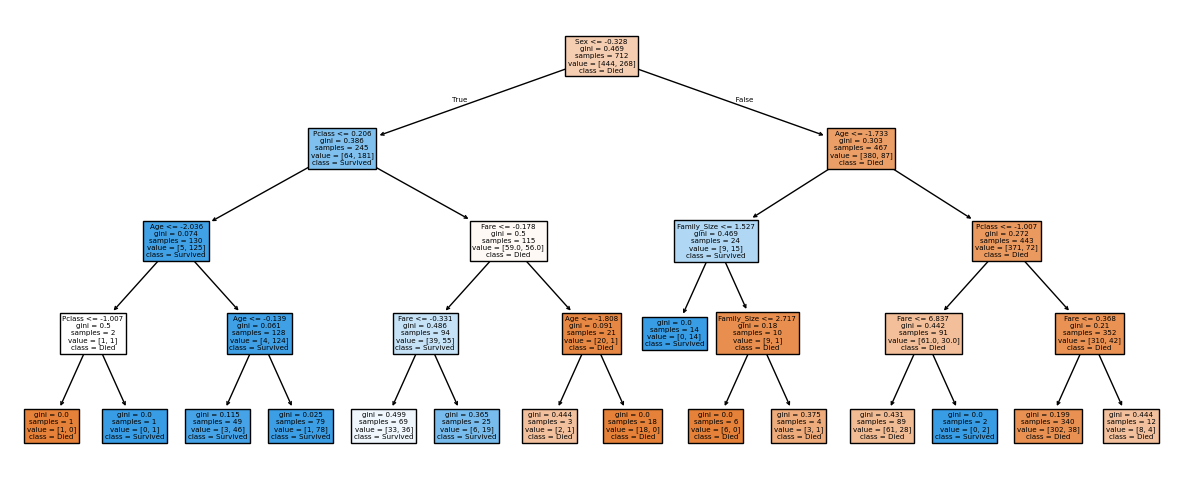

In [429]:
plt.figure(figsize=(15, 6))
plot_tree(tree_clf, filled=True, feature_names=features, class_names=['Died', 'Survived'])
plt.show()


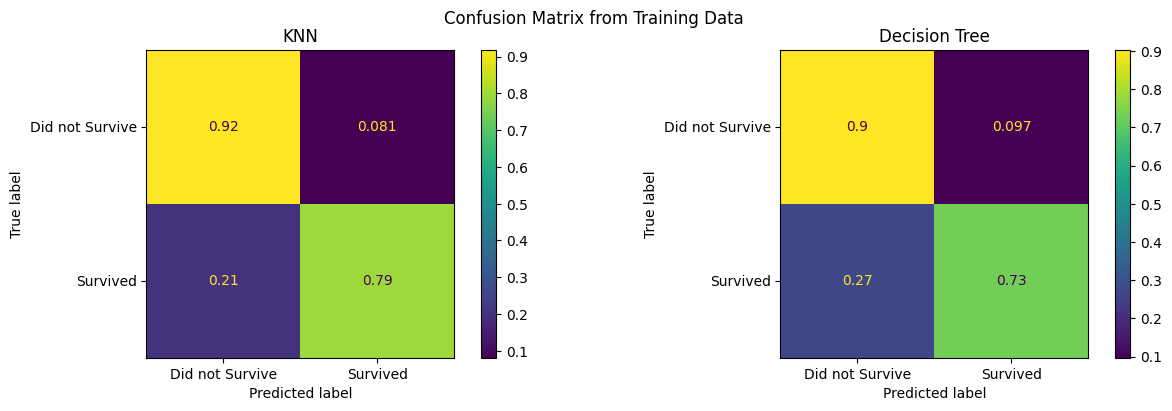

In [430]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(1,2, figsize = (15,4))


y_knn_train = knn_clf.predict(Xs_train)
y_knn_test = knn_clf.predict(Xs_test)

y_tree_train = tree_clf.predict(Xs_train)
y_tree_test = tree_clf.predict(Xs_test)

ConfusionMatrixDisplay.from_predictions(ys_train, y_knn_train,
                                        normalize = 'true',
                                        display_labels = ['Did not Survive', 'Survived'],
                                        ax = ax[0])

ConfusionMatrixDisplay.from_predictions(ys_train, y_tree_train,
                                        normalize = 'true',
                                        display_labels = ['Did not Survive', 'Survived'],
                                        ax = ax[1])

fig.suptitle('Confusion Matrix from Training Data')
ax[0].set_title('KNN')
ax[1].set_title('Decision Tree')
plt.show()
                                       

Text(0.5, 1.0, 'Decision Tree')

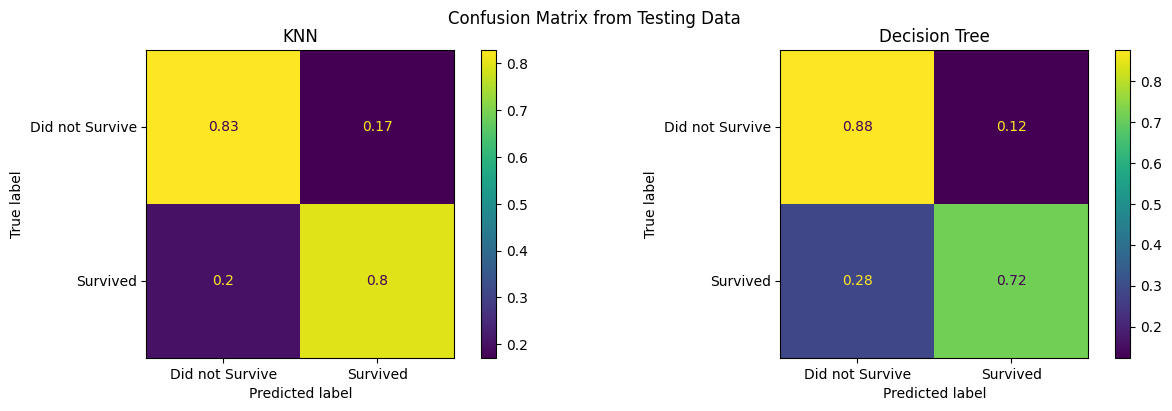

In [431]:
fig, ax = plt.subplots(1,2, figsize = (15,4))

ConfusionMatrixDisplay.from_predictions(ys_test, y_knn_test, 
        normalize='true', display_labels = ['Did not Survive', 'Survived'], ax = ax[0])


ConfusionMatrixDisplay.from_predictions(ys_test, y_tree_test, 
        normalize='true', display_labels = ['Did not Survive', 'Survived'], ax = ax[1])


fig.suptitle('Confusion Matrix from Testing Data')
ax[0].set_title('KNN')
ax[1].set_title('Decision Tree')


#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 KNN
 - After testing with different neatest neighbors, the model performance on the test data is slightly worse than the performance on the training data. 
 - For Survived, The model performance on the test data is 0.8 while the performance on the training data is 0.8, remaining the same
 - For Did Not Survive, The model performance on the test data is 0.9 while the performance on the training data is 0.8.

Tree

 - The model performance on the test data is slightly worse than the performance on the training data. 
 - For Survived, The model performance on the test data is 0.7 while the performance on the training data is 0.7,  remaining the same.
 - For Survived, The model performance on the test data is 0.9 while the performance on the training data is 0.88.


Which models did you fit and which worked better?
 
 - Useing Tree and KNN, I believe KNN worked better